<a href="https://colab.research.google.com/github/nihar6697/Assignment/blob/main/Task6_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df.shape

(804, 12)

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.sample(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
208,9789.037676,22986,Chevrolet,AVEO,SVM Hatchback 4D,Hatchback,4,1.6,4,0,1,1
541,16379.853004,4188,Pontiac,Grand Am,SE Sedan 4D,Sedan,4,2.2,4,1,1,1
488,21403.756422,27168,Pontiac,Bonneville,GXP Sedan 4D,Sedan,8,4.6,4,1,0,1
51,21956.342663,17787,Buick,Lesabre,Limited Sedan 4D,Sedan,6,3.8,4,1,1,0
627,15622.121098,23217,Pontiac,Vibe,Sportwagon 4D,Wagon,4,1.8,4,1,1,1
429,16295.211438,28239,Chevrolet,Malibu,LT Sedan 4D,Sedan,6,3.5,4,0,1,1
371,18835.189761,8211,Chevrolet,Impala,Sedan 4D,Sedan,6,3.8,4,1,0,1
64,23493.082295,20453,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,0
490,19682.035011,11554,Pontiac,Bonneville,SE Sedan 4D,Sedan,6,3.8,4,1,0,1
415,18004.870415,18771,Chevrolet,Malibu,LT MAXX Hback 4D,Hatchback,6,3.5,4,0,1,1


#Tasks,part-1

Text(0, 0.5, 'Price')

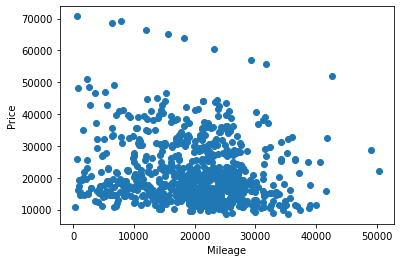

In [ ]:
#plotting graph between price vs mileage
plt.scatter(df['Mileage'],df['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

#First check outlier in each coloumn

Price

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


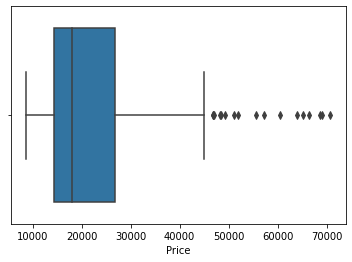

In [ ]:
sns.boxplot(df["Price"])

In [ ]:
df["Price"].describe()

count      804.000000
mean     21343.143767
std       9884.852801
min       8638.930895
25%      14273.073870
50%      18024.995019
75%      26717.316636
max      70755.466717
Name: Price, dtype: float64

In [ ]:
#finding IQR
percentile25 = df["Price"].quantile(0.25)
percentile75 = df["Price"].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
iqr

12444.242765331575

In [ ]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 45383.68078365926
Lower limit -4393.290277667038


#Removing outlier by capping technique where data>upper limit converted to =upper limit similarly for lower limit also

In [ ]:

df['Price'] = np.where(
    df['Price']>upper_limit,
    upper_limit,
    np.where(
        df['Price']<lower_limit,
        lower_limit,
        df['Price']
    ) 
)
df['Price'].describe()


count      804.000000
mean     21099.998496
std       9031.505318
min       8638.930895
25%      14273.073870
50%      18024.995019
75%      26717.316636
max      45383.680784
Name: Price, dtype: float64

#Removing outlier by trimming technique

In [ ]:
#new_df1 = df[df["Price"] < upper_limit]    #but in trimming technique there is still some outlier.
#new_df1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


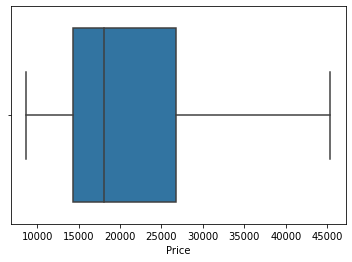

In [ ]:
sns.boxplot(df["Price"])

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


Mileage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


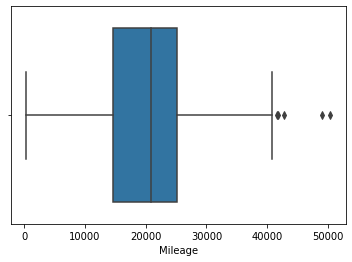

In [ ]:
sns.boxplot(df["Mileage"])

In [ ]:
df["Mileage"].describe()

count      804.000000
mean     19831.934080
std       8196.319707
min        266.000000
25%      14623.500000
50%      20913.500000
75%      25213.000000
max      50387.000000
Name: Mileage, dtype: float64

In [ ]:
#finding IQR
percentile25 = df["Mileage"].quantile(0.25)
percentile75 = df["Mileage"].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
iqr

10589.5

In [ ]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 41097.25
Lower limit -1260.75


In [ ]:

df['Mileage'] = np.where(
    df['Mileage']>upper_limit,
    upper_limit,
    np.where(
        df['Mileage']<lower_limit,
        lower_limit,
        df['Mileage']
    ) 
)
df['Mileage'].describe()

count      804.000000
mean     19807.086132
std       8119.836852
min        266.000000
25%      14623.500000
50%      20913.500000
75%      25213.000000
max      41097.250000
Name: Mileage, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


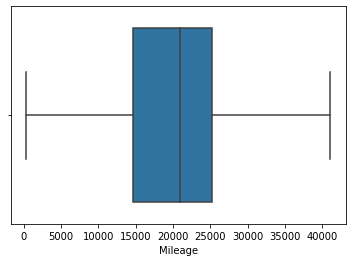

In [ ]:
sns.boxplot(df['Mileage'])

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.dtypes

Price       float64
Mileage     float64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


Text(0, 0.5, 'Price')

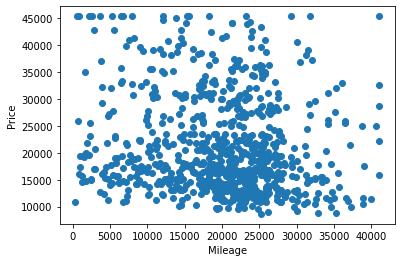

In [ ]:
#plotting graph between price vs mileage
plt.scatter(df['Mileage'],df['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')

In [ ]:
df[['Mileage','Price']].corr()      #There is no linear relation between mileage and price

,Mileage,Price
Mileage,1.000000,-0.138997
Price,-0.138997,1.000000


#Find the linear regression equation for Mileage vs Price

In [ ]:
X = df[['Mileage']].values 
y = df['Price'].values                 #y=Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
m=lr.coef_
m

array([-0.13087562])

In [ ]:
c=lr.intercept_
c

23735.64976128043

In [ ]:
#y = mx + c
#y = -0.12650426x + 23832.76305091639

#Chart the original data and the equation on the chart.

Text(0, 0.5, 'Price')

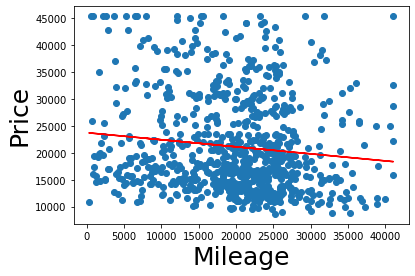

In [ ]:
plt.scatter(df['Mileage'],df['Price'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Mileage',fontsize = 25)
plt.ylabel('Price',fontsize = 25)

#Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,12379.126473,19652.461374
1,16792.679529,22155.850184
2,14401.906929,20918.290346
3,13719.238308,20641.095788
4,21575.456827,21100.207454


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.041229122832259435


#Tasks,part-2

In [ ]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
df.sample(12)     #randomly select 12 rows

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
720,30800.658389,8017,SAAB,9_5 HO,Aero Sedan 4D,Sedan,4,2.3,4,1,0,1
547,13961.111642,19602,Pontiac,Grand Am,SE Sedan 4D,Sedan,4,2.2,4,0,1,1
557,16283.958991,26511,Pontiac,Grand Prix,GT Sedan 4D,Sedan,6,3.8,4,1,0,1
345,39547.587900,23826,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,1,1,1
60,25589.983155,2308,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,0
669,23733.402249,27600,SAAB,9_3 HO,Aero Sedan 4D,Sedan,4,2.0,4,1,1,0
660,26841.080835,10003,SAAB,9_3 HO,Aero Sedan 4D,Sedan,4,2.0,4,1,1,0
113,41419.037262,14452,Cadillac,Deville,DTS Sedan 4D,Sedan,8,4.6,4,1,0,1
68,21698.014746,25489,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,1
147,41053.482168,25717,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,1,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


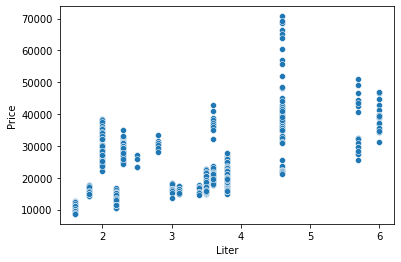

In [ ]:
sns.scatterplot(df["Liter"],df["Price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


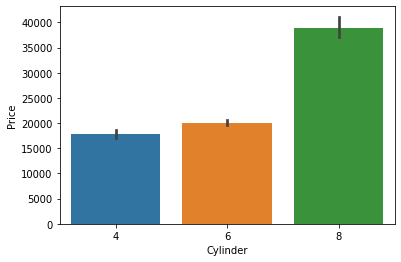

In [ ]:
sns.barplot(df["Cylinder"],df["Price"])          #categorical vs continious thats why barplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


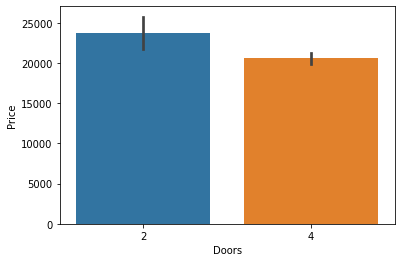

In [ ]:
sns.barplot(df["Doors"],df["Price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


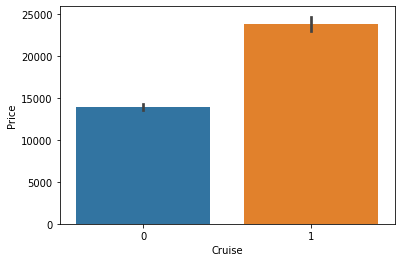

In [ ]:
sns.barplot(df["Cruise"],df["Price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


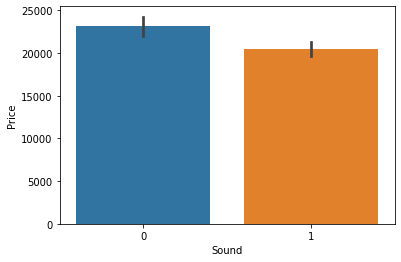

In [ ]:
sns.barplot(df["Sound"],df["Price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


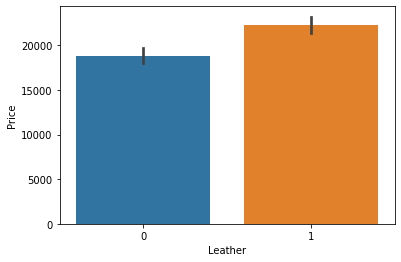

In [ ]:
sns.barplot(df["Leather"],df["Price"])

In [ ]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df['Price'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
scaler.var_

array([6.63422662e+07, 1.84494823e+00, 1.19645083e+00, 7.22043106e-01,
       1.88468227e-01, 2.20467337e-01, 2.03604314e-01])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lr.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
y_pred = lr.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1313.366536
Cylinder,5606.501273
Liter,-1159.049575
Doors,-1384.692463
Cruise,2668.655960
Sound,-1161.111022
Leather,1500.599151


In [ ]:
lr.intercept_

21230.092831096987

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4121083909015888


#Find the combination of the factors that is the best predictor for price.

In [ ]:

from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],selector.support_))

[('Mileage', True),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', True),
 ('Cruise', True),
 ('Sound', True),
 ('Leather', True)]

Selecting Important features by using Sequential Feature Selector

In [ ]:

from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


#Tasks, Hard Mode

#Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [ ]:
df=pd.get_dummies(df,columns=["Make","Model","Trim","Type"])
df.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Se

In [ ]:
X = df[['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']].values 
y = df['Price'].values

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
scaler.var_

array([0.08333797, 0.08586791, 0.24085196, 0.15373601, 0.12260763,
       0.07039804, 0.00464386, 0.02426418, 0.05008115, 0.03449035,
       0.02426418, 0.07433081, 0.03449035, 0.00924419, 0.01228688,
       0.06775201, 0.00924419, 0.01380098, 0.05560541, 0.02573957,
       0.03736858, 0.02426418, 0.01076795, 0.02867585, 0.03880043,
       0.03880043, 0.06105227, 0.01076795, 0.03880043, 0.01980897,
       0.06642174, 0.03736858, 0.02129888, 0.01076795, 0.00924419,
       0.01228688, 0.03449035, 0.01380098, 0.06240189, 0.14485463,
       0.06907744, 0.239304  , 0.07302473])

Model fitting

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lr.coef_,['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'], columns=['Coefficient'])
y_pred = lr.predict(X_test_scaled)
coeff_df

,Coefficient
Make_Buick,9.026432e+14
Make_Cadillac,-4.434224e+16
Make_Chevrolet,1.956677e+16
Make_Pontiac,-1.356139e+16
Make_SAAB,-4.813669e+16
Make_Saturn,-1.134094e+17
Model_9-2X AWD,-1.383573e+15
Model_9_3,-3.162607e+15
Model_9_3 HO,-4.543594e+15
Model_9_5,-3.770606e+15


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,17162.873441,18023.163354
1,23274.480711,25527.163354
2,22525.269722,20599.163354
3,17095.035224,18023.163354
4,19344.165537,20999.163354


calculating R2 score

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9574647205475009


#2. Find the best combination of factors to predict price.

In [ ]:

from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],selector.support_))

[('Make_Buick', False),
 ('Make_Cadillac', False),
 ('Make_Chevrolet', False),
 ('Make_Pontiac', False),
 ('Make_SAAB', False),
 ('Make_Saturn', False),
 ('Model_9-2X AWD', False),
 ('Model_9_3', False),
 ('Model_9_3 HO', False),
 ('Model_9_5', False),
 ('Model_9_5 HO', False),
 ('Model_AVEO', False),
 ('Model_Bonneville', False),
 ('Model_CST-V', False),
 ('Model_CTS', False),
 ('Model_Cavalier', False),
 ('Model_Century', False),
 ('Model_Classic', False),
 ('Model_Cobalt', False),
 ('Model_Corvette', False),
 ('Model_Deville', False),
 ('Model_G6', False),
 ('Model_GTO', False),
 ('Model_Grand Am', False),
 ('Model_Grand Prix', False),
 ('Model_Impala', False),
 ('Model_Ion', False),
 ('Model_L Series', False),
 ('Model_Lacrosse', False),
 ('Model_Lesabre', False),
 ('Model_Malibu', False),
 ('Model_Monte Carlo', False),
 ('Model_Park Avenue', False),
 ('Model_STS-V6', False),
 ('Model_STS-V8', False),
 ('Model_Sunfire', False),
 ('Model_Vibe', True),
 ('Model_XLR-V8', False),
 ('Ty